<a href="https://colab.research.google.com/github/PabloLarreta17/Probabilidad/blob/main/Unidad5/PRACTICA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#   PRACTICA DE REGRESIÓN LINEAL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from IPython.display import display

In [4]:
# Archivos
files = ["grupo1.csv", "grupo2.csv", "grupo3.csv"]
group_names = ["Grupo 1", "Grupo 2", "Grupo 3"]

results = []
#      FUNCIÓN AUXILIAR PARA DETECTAR COLUMNAS
def find_column(df, keywords):
    for col in df.columns:
        name = col.lower()
        if any(kw in name for kw in keywords):
            return col
    return None


 Grupo 1


,Horas_estudio,Calificacion_final
0,20.00,75.94
1,15.60,87.48
2,17.91,79.40
3,20.00,73.37
4,20.00,83.75



 Descripción estadística:


,Horas_estudio,Calificacion_final
count,50.000000,50.00000
mean,14.352000,83.78820
std,4.219174,7.83389
min,3.790000,68.46000
25%,12.032500,78.03500
50%,14.600000,84.49000
75%,17.715000,88.09000
max,20.000000,100.00000


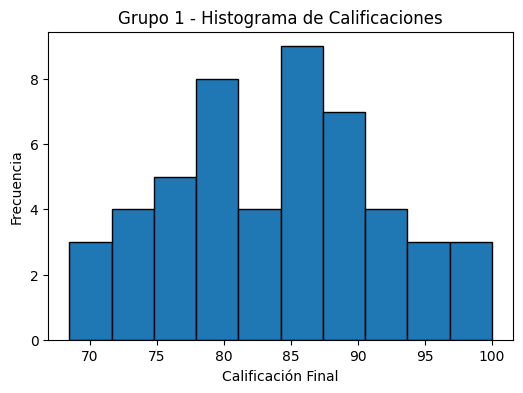

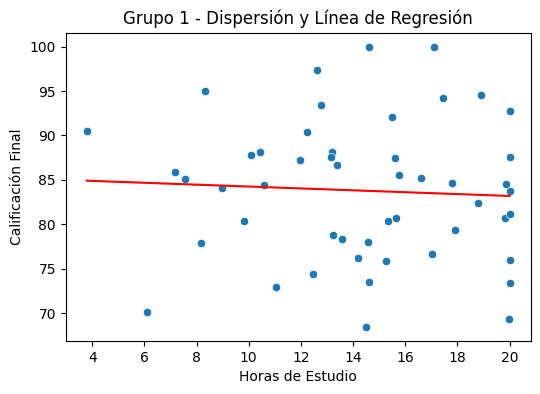


📌 RESULTADOS DEL MODELO:
Ecuación de regresión: Calificación = 85.3107 + -0.1061 * Horas
r (correlación de Pearson): -0.0571
R²: 0.0033
p-valor de la pendiente: 6.9351e-01

 Grupo 2


,Horas_estudio,Calificacion_final
0,3.79,40.0
1,6.08,26.1
2,7.17,29.0
3,7.54,31.9
4,8.18,34.8



 Descripción estadística:


,Horas_estudio,Calificacion_final
count,50.000000,50.000000
mean,14.352000,75.912000
std,4.219174,20.668922
min,3.790000,26.100000
25%,12.032500,63.500000
50%,14.600000,78.550000
75%,17.715000,93.300000
max,20.000000,99.000000


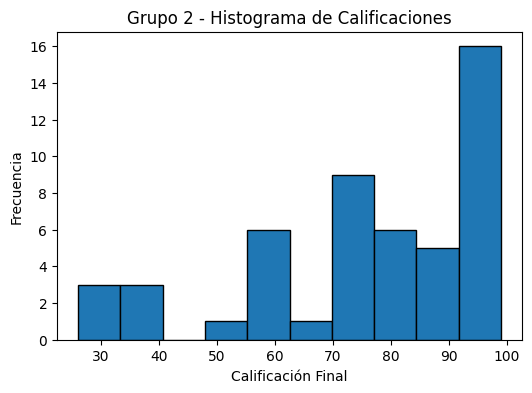

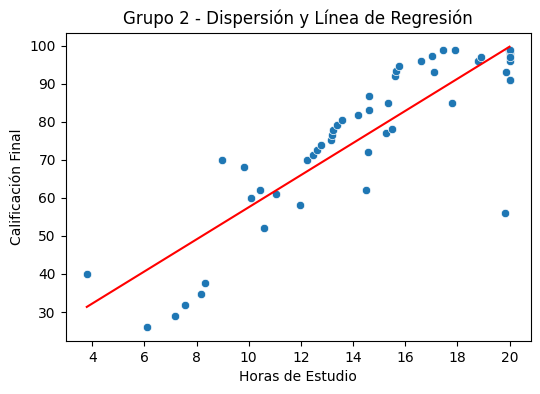


📌 RESULTADOS DEL MODELO:
Ecuación de regresión: Calificación = 15.3075 + 4.2227 * Horas
r (correlación de Pearson): 0.8620
R²: 0.7430
p-valor de la pendiente: 9.0777e-16

 Grupo 3


,Horas_estudio,Calificacion_final
0,3.79,15.0
1,6.08,26.1
2,7.17,29.0
3,7.54,31.9
4,8.18,34.8



 Descripción estadística:


,Horas_estudio,Calificacion_final
count,50.000000,50.000000
mean,14.352000,75.968000
std,4.219174,23.668867
min,3.790000,15.000000
25%,12.032500,61.000000
50%,14.600000,84.950000
75%,17.715000,94.375000
max,20.000000,99.000000


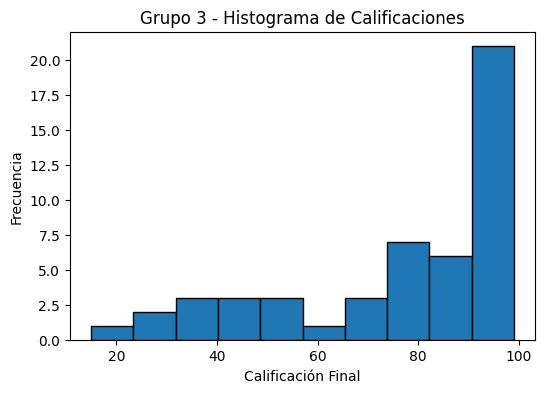

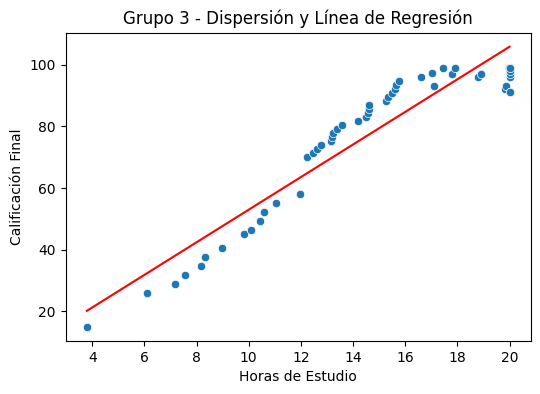


📌 RESULTADOS DEL MODELO:
Ecuación de regresión: Calificación = 0.1081 + 5.2857 * Horas
r (correlación de Pearson): 0.9422
R²: 0.8878
p-valor de la pendiente: 1.9342e-24

 RESUMEN GENERAL DE LOS 3 GRUPOS


,Grupo,n,Pendiente,Intercepto,Correlación (r),R²,p-valor
0,Grupo 3,50,5.285671,0.108051,0.942215,0.887769,1.934152e-24
1,Grupo 1,50,-0.106082,85.310682,-0.057133,0.003264,6.935088e-01
2,Grupo 2,50,4.222719,15.307542,0.861989,0.743025,9.077714e-16
3,Grupo 3,50,5.285671,0.108051,0.942215,0.887769,1.934152e-24


In [8]:
#      PROCESAMIENTO DE CADA GRUPO
for filename, grupo in zip(files, group_names):

    print("\n=====================================")
    print(f" {grupo}")
    print("=====================================")

    df = pd.read_csv(filename)

    # Identificar columnas
    col_horas = find_column(df, ["hora", "estudio", "horas", "tiempo"])
    col_calif = find_column(df, ["calif", "nota", "final", "grade", "score", "calificación"])

    if col_horas is None or col_calif is None:
        print("No se detectaron las columnas automáticamente.")
        print("Columnas disponibles:", list(df.columns))
        continue

    df = df[[col_horas, col_calif]].dropna()
    df.columns = ["Horas_estudio", "Calificacion_final"]

    display(df.head())
    #        DESCRIPCIÓN ESTADÍSTICA
    print("\n Descripción estadística:")
    display(df.describe())
    #        HISTOGRAMA DE CALIFICACIONES
    plt.figure(figsize=(6,4))
    plt.hist(df["Calificacion_final"], bins=10, edgecolor="black")
    plt.title(f"{grupo} - Histograma de Calificaciones")
    plt.xlabel("Calificación Final")
    plt.ylabel("Frecuencia")
    plt.grid(False)
    plt.show()
    #     REGRESIÓN LINEAL
    x = df["Horas_estudio"]
    y = df["Calificacion_final"]

    lr = stats.linregress(x, y)

    slope = lr.slope
    intercept = lr.intercept
    r_value = lr.rvalue
    r_squared = r_value ** 2
    p_value = lr.pvalue
    #     GRAFICA: SCATTER + REGRESIÓN
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=x, y=y)
    xs = np.linspace(x.min(), x.max(), 100)
    ys = intercept + slope * xs
    plt.plot(xs, ys, color="red")
    plt.title(f"{grupo} - Dispersión y Línea de Regresión")
    plt.xlabel("Horas de Estudio")
    plt.ylabel("Calificación Final")
    plt.show()
    #     CORRELACIÓN PEARSON
    pearson_r, pearson_p = stats.pearsonr(x, y)

    # Guardar resultados
    results.append({
        "Grupo": grupo,
        "n": len(df),
        "Pendiente": slope,
        "Intercepto": intercept,
        "Correlación (r)": pearson_r,
        "R²": r_squared,
        "p-valor": p_value
    })

    # Mostrar resultados por grupo
    print("\n📌 RESULTADOS DEL MODELO:")
    print(f"Ecuación de regresión: Calificación = {intercept:.4f} + {slope:.4f} * Horas")
    print(f"r (correlación de Pearson): {pearson_r:.4f}")
    print(f"R²: {r_squared:.4f}")
    print(f"p-valor de la pendiente: {p_value:.4e}")

#      TABLA RESUMEN FINAL
print("\n=====================================")
print(" RESUMEN GENERAL DE LOS 3 GRUPOS")
print("=====================================")

df_results = pd.DataFrame(results)
display(df_results)

